## Graph mining

Realizado por: Erick França, Gabriel Borba, Henrique Kalke e Rodrigo Roth

In [ ]:
!pip install cdlib

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import heapq 
import networkx.algorithms.link_prediction as link_prediction
from cdlib import algorithms, viz

In [ ]:
data1 = pd.read_csv("got-s1-edges.csv", delimiter=";")
G1 = nx.from_pandas_edgelist(data1, source='Source', target='Target', edge_attr='Weight')
pos1 = nx.spring_layout(G1)

In [ ]:
data1.head()

,Source,Target,Weight
0,NED,ROBERT,192
1,DAENERYS,JORAH,154
2,JON,SAM,121
3,LITTLEFINGER,NED,107
4,NED,VARYS,96


In [ ]:
data2 = pd.read_csv("got-s8-edges.csv", delimiter=";")
G8 = nx.from_pandas_edgelist(data2, source='Source', target='Target', edge_attr='Weight')
pos2 = nx.spring_layout(G8)

In [ ]:
data2.head()

,Source,Target,Weight
0,DAENERYS,JON,194
1,DAENERYS,TYRION,122
2,JAIME,TYRION,122
3,BRIENNE,JAIME,121
4,JON,TYRION,116


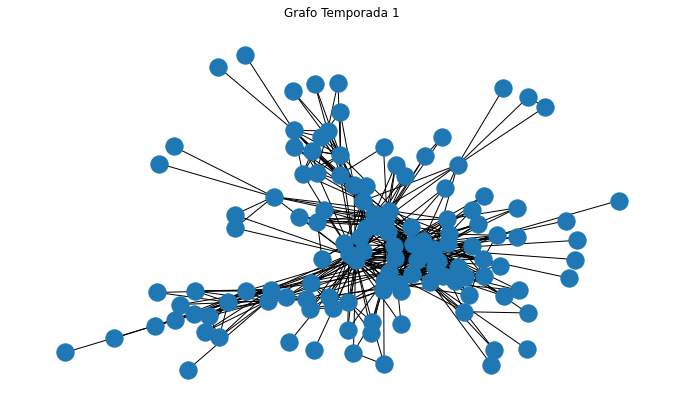

In [ ]:
plt.figure(figsize=(12,7))
plt.title('Grafo Temporada 1')
nx.draw(G1)

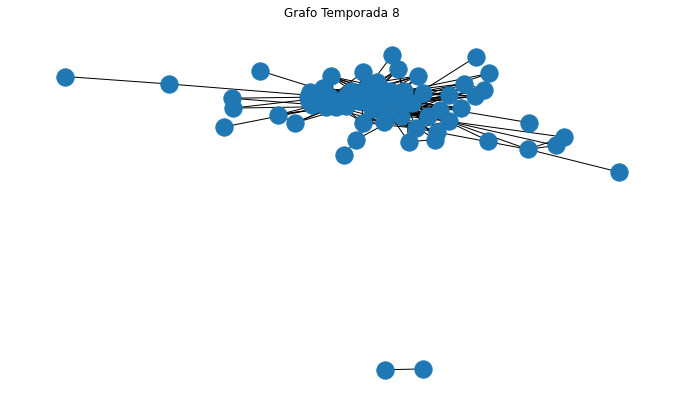

In [ ]:
plt.figure(figsize=(12,7))
plt.title('Grafo Temporada 8')
nx.draw(G8)

In [ ]:
G1.degree()

DegreeView({'NED': 57, 'ROBERT': 36, 'DAENERYS': 18, 'JORAH': 15, 'JON': 26, 'SAM': 12, 'LITTLEFINGER': 26, 'VARYS': 21, 'DROGO': 13, 'ARYA': 28, 'CATELYN': 36, 'ROBB': 30, 'BRONN': 12, 'TYRION': 41, 'CERSEI': 29, 'SHAE': 3, 'JOFFREY': 27, 'SANSA': 26, 'PYCELLE': 16, 'VISERYS': 9, 'SEPTA_MORDANE': 6, 'TYWIN': 17, 'JEOR': 16, 'THEON': 19, 'BRAN': 20, 'MAESTER_LUWIN': 10, 'JAIME': 24, 'LORAS': 8, 'RENLY': 17, 'MIRRI_MAZ_DUUR': 5, 'SYRIO_FOREL': 3, 'JORY_CASSEL': 8, 'PYP': 16, 'ROS': 9, 'GRENN': 8, 'WALDER': 8, 'DOREAH': 8, 'BENJEN': 9, 'IRRI': 7, 'GREATJON_UMBER': 12, 'MORD': 7, 'LYSA': 7, 'RAKHARO': 8, 'ROBIN': 7, 'OSHA': 6, 'RODRIK': 13, 'QOTHO': 5, 'MAESTER_AEMON': 9, 'BARRISTAN': 11, 'ILLYRIO': 6, 'SHAGGA': 4, 'YOREN': 16, 'ALLISER_THORNE': 8, 'WINE_MERCHANT': 4, 'HOUND': 18, 'LANCEL': 5, 'RICKON': 3, 'MARILLION': 7, 'KEVAN': 7, 'VARDIS_EGEN': 6, 'RHAEGO': 4, 'JANOS': 5, 'GENDRY': 6, 'HOT_PIE': 3, 'LOMMY_GREENHANDS': 2, 'MERYN_TRANT': 9, 'JON_ARRYN': 11, 'HODOR': 5, 'STANNIS': 9, 'MA

#Tarefa 1, temporada 1

In [ ]:
grau_G = dict(Grafo_temporada1.degree())
grau_G = list(grau_G.values())
grau_medio_G = np.mean(grau_G)

<Figure size 1000x500 with 0 Axes>

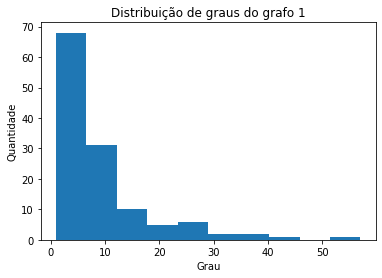

<Figure size 1000x500 with 0 Axes>

In [ ]:
plt.hist(grau_G)
plt.title('Distribuição de graus do grafo 1')
plt.xlabel('Grau')
plt.ylabel('Quantidade')
figure(figsize=(10, 5), dpi=100)

In [ ]:
print("Grau médio da rede :", grau_medio_G)

Grau médio da rede : 8.714285714285714


In [ ]:
print('Densidade do grafo G:'
      , nx.density(Grafo_temporada1))

Densidade do grafo G: 0.06971428571428571


In [ ]:
G=nx.complete_graph(5)
print('Transitividade do grafo G:'
       , nx.transitivity(Grafo_temporada1))

Transitividade do grafo G: 0.38325183374083127


#Tarefa 1, temporada 8

In [ ]:
grau_G8 = dict(G8.degree())
grau_G8 = list(grau_G8.values())
grau_medio_G8 = np.mean(grau_G8)

<Figure size 1000x500 with 0 Axes>

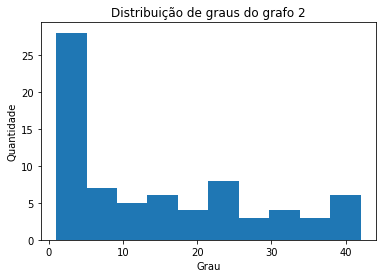

<Figure size 1000x500 with 0 Axes>

In [ ]:
plt.hist(grau_G8)
plt.title('Distribuição de graus do grafo 2')
plt.xlabel('Grau')
plt.ylabel('Quantidade')
figure(figsize=(10, 5), dpi=100)

In [ ]:
print("Grau médio da rede :", grau_medio_G8)

Grau médio da rede : 14.945945945945946


In [ ]:
print('Densidade do grafo G:'
      , nx.density(Grafo_temporada8))

Densidade do grafo G: 0.20473898556090336


In [ ]:
print('Transitividade do grafo G:'
       , nx.transitivity(Grafo_temporada8))

Transitividade do grafo G: 0.6441837028505615


#Tarefa 2, temporada 1

In [ ]:
nx.shortest_path(G1, 'ARYA', 'JON')

['ARYA', 'JON']

In [ ]:
nx.shortest_path_length(G1, 'ARYA', 'JON')

1

#Tarefa 2, temporada 8

In [ ]:
nx.shortest_path(G1, 'ARYA', 'SAM')

['ARYA', 'JON', 'SAM']

In [ ]:
nx.shortest_path_length(G1, 'ARYA', 'SAM')

2

#Tarefa 3, temporada 1

In [ ]:
intermediacao = nx.betweenness_centrality(G1)
proximidade = nx.closeness_centrality(G1)
autovetor = nx.eigenvector_centrality(G1)

In [ ]:
intermediacao = list(intermediacao.values())
proximidade = list(proximidade.values())
autovetor = list(autovetor.values())

In [ ]:
maior_intermediacao = heapq.nlargest(3,intermediacao) 

print(maior_intermediacao)

[0.3032802081478768, 0.16302743524270866, 0.11828405295282027]


In [ ]:
maior_proximidade = heapq.nlargest(3,proximidade) 

print(maior_proximidade)

[0.628140703517588, 0.5530973451327433, 0.5506607929515418]


In [ ]:
maior_autovetor = heapq.nlargest(3,autovetor)

print(maior_autovetor)

[0.3150820196903641, 0.2481899669033885, 0.23926199958075803]


#Tarefa 3, temporada 8

In [ ]:
intermediacao = nx.betweenness_centrality(G8)
proximidade = nx.closeness_centrality(G8)
autovetor = nx.eigenvector_centrality(G8)

In [ ]:
intermediacao = list(intermediacao.values())
proximidade = list(proximidade.values())
autovetor = list(autovetor.values())

In [ ]:
maior_intermediacao = heapq.nlargest(3,intermediacao) 

print(maior_intermediacao)

[0.13390159981644, 0.09913291196077363, 0.09902087596468986]


In [ ]:
maior_proximidade = heapq.nlargest(3,proximidade) 

print(maior_proximidade)

[0.6770077894171367, 0.670434898257747, 0.670434898257747]


In [ ]:
maior_autovetor = heapq.nlargest(3,autovetor) 

print(maior_autovetor)

[0.21789621436284165, 0.21715160565017622, 0.2158125126175413]


#Tarefa 4, temporada 1

In [ ]:
G1.edges("ARYA")

EdgeDataView([('ARYA', 'NED'), ('ARYA', 'SANSA'), ('ARYA', 'SYRIO_FOREL'), ('ARYA', 'JOFFREY'), ('ARYA', 'JON'), ('ARYA', 'YOREN'), ('ARYA', 'SEPTA_MORDANE'), ('ARYA', 'ROBERT'), ('ARYA', 'CERSEI'), ('ARYA', 'CATELYN'), ('ARYA', 'GENDRY'), ('ARYA', 'HOUND'), ('ARYA', 'JORY_CASSEL'), ('ARYA', 'STABLE_BOY'), ('ARYA', 'VARYS'), ('ARYA', 'ROBB'), ('ARYA', 'BAELOR'), ('ARYA', 'BRAN'), ('ARYA', 'HOT_PIE'), ('ARYA', 'LITTLEFINGER'), ('ARYA', 'MERYN_TRANT'), ('ARYA', 'MYCAH'), ('ARYA', 'ILYN_PAYNE'), ('ARYA', 'JAIME'), ('ARYA', 'PYCELLE'), ('ARYA', 'ILLYRIO'), ('ARYA', 'LOMMY_GREENHANDS'), ('ARYA', 'TYRION')])

In [ ]:
G1.has_edge('ARYA', 'SAM')

False

In [ ]:
nx.shortest_path_length(G1, 'ARYA', 'SAM')

2

In [ ]:
nx.shortest_path(G1, 'ARYA', 'SAM')

['ARYA', 'JON', 'SAM']

In [ ]:
conexoes_ausentes = [('ARYA', 'SAM')]

In [ ]:
predicao_ausentes = link_prediction.jaccard_coefficient(G1,conexoes_ausentes)

for u,v,p in predicao_ausentes:
  print(u,v,p)

ARYA SAM 0.02564102564102564


#Tarefa 4, temporada 8

In [ ]:
G8.edges("ARYA")

EdgeDataView([('ARYA', 'GENDRY'), ('ARYA', 'JON'), ('ARYA', 'HOUND'), ('ARYA', 'SANSA'), ('ARYA', 'DAVOS'), ('ARYA', 'NORA'), ('ARYA', 'BRAN'), ('ARYA', 'DAENERYS'), ('ARYA', 'BERIC'), ('ARYA', 'VICKY'), ('ARYA', 'GREY_WORM'), ('ARYA', 'MELISANDRE'), ('ARYA', 'TYRION'), ('ARYA', 'SAM'), ('ARYA', 'TORMUND'), ('ARYA', 'VARYS'), ('ARYA', 'BRIENNE'), ('ARYA', 'CERSEI'), ('ARYA', 'JORAH'), ('ARYA', 'MISSANDEI'), ('ARYA', 'LYANNA_MORMONT'), ('ARYA', 'MAESTER_WOLKAN'), ('ARYA', 'OWEN'), ('ARYA', 'QHONO'), ('ARYA', 'THEON'), ('ARYA', 'YOHN_ROYCE'), ('ARYA', 'ALYS'), ('ARYA', 'JAIME'), ('ARYA', 'NIGHT_KING'), ('ARYA', 'YARA'), ('ARYA', 'DORNISH_PRINCE'), ('ARYA', 'EDDISON_TOLLETT'), ('ARYA', 'EDMURE'), ('ARYA', 'IRONBORN_LORD'), ('ARYA', 'MOUNTAIN'), ('ARYA', 'PODRICK'), ('ARYA', 'RIVERLANDS_LORD'), ('ARYA', 'ROBIN'), ('ARYA', 'VALE_LORD')])

In [ ]:
G8.has_edge('ARYA', 'SAM')

True

In [ ]:
nx.shortest_path_length(G8, 'ARYA', 'SAM')

1

In [ ]:
nx.shortest_path(G8, 'ARYA', 'SAM')

['ARYA', 'SAM']

In [ ]:
conexoes_presentes = [('ARYA', 'SAM')]

In [ ]:
predicao_presentes = link_prediction.jaccard_coefficient(G8,conexoes_presentes)

for u,v,p in predicao_presentes:
  print(u,v,p)

ARYA SAM 0.62


#Tarefa 5, temporada 1

In [ ]:
comunidade1 = algorithms.girvan_newman(G1, level=1)
viz.plot_network_clusters(G1, comunidade1, pos1, figsize =(17,11))

#Tarefa 5, temporada 8

In [ ]:
comunidade2 = algorithms.girvan_newman(G2, level=1)
viz.plot_network_clusters(G8, comunidade1, pos2, figsize =(17,11))